In [2]:
# Importing libraries for data processing and model building
import pandas as pd
import numpy as np

# For splitting the data and scaling features
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Importing classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# For evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For saving the best model using pickle
import pickle

# To ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("/content/MergedCropRecommendation.csv")

print("Dataset Head:")
print(data.head())

print("\nDataset Info:")
print(data.info())

print("\nDataset Description:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Head:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3131 entries, 0 to 3130
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            3131 non-null   int64  
 1   P            3131 non-null   int64  
 2   K            3131 non-null   int64  
 3   temperature  3131 non-null   float64
 4   humidity     3131 non-null   float64
 5   ph           3131 non-null   float64
 6   rainfall     3131 non-null   float64
 7   label        3131 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory us

In [4]:
# Separating the features and the target
X = data.drop("label", axis=1)
y = data["label"]

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply Standard Scaling to the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")


Data preprocessing completed.


Initial model training.

In [5]:
# Define a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Dictionary to store the performance of each model
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    # Fit the model on training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Cross-validation scores (using 5 folds)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    cv_mean = cv_scores.mean()

    # Save performance and model information
    model_performance[model_name] = {
        "Test Accuracy": accuracy,
        "CV Mean Accuracy": cv_mean,
        "Model": model
    }

    # Display the results
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(f"{model_name} Cross-Validation Mean Accuracy: {cv_mean:.4f}")

print("\nModel evaluation completed.")



Training Logistic Regression...
Logistic Regression Test Accuracy: 0.7687
Logistic Regression Cross-Validation Mean Accuracy: 0.7648

Training Decision Tree...
Decision Tree Test Accuracy: 0.7049
Decision Tree Cross-Validation Mean Accuracy: 0.7244

Training Random Forest...
Random Forest Test Accuracy: 0.7018
Random Forest Cross-Validation Mean Accuracy: 0.7296

Training K-Nearest Neighbors...
K-Nearest Neighbors Test Accuracy: 0.7432
K-Nearest Neighbors Cross-Validation Mean Accuracy: 0.7688

Training Support Vector Machine...
Support Vector Machine Test Accuracy: 0.8134
Support Vector Machine Cross-Validation Mean Accuracy: 0.7955

Model evaluation completed.


In [6]:
# Select the best model based on test accuracy
best_model_name = None
best_accuracy = 0
best_model = None

for model_name, performance in model_performance.items():
    if performance["Test Accuracy"] > best_accuracy:
        best_accuracy = performance["Test Accuracy"]
        best_model_name = model_name
        best_model = performance["Model"]

print(f"\nThe best model is: {best_model_name} with a test accuracy of {best_accuracy:.4f}")

#saving hte model
model_filename = "best_crop_recommendation_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump({
        'model': best_model,
        'scaler': scaler,
        'label_encoder': label_encoder
    }, f)

print(f"Model saved to {model_filename}")



The best model is: Support Vector Machine with a test accuracy of 0.8134
Model saved to best_crop_recommendation_model.pkl


In [7]:
# Performing additional evaluation on the best model
y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

print("Confusion Matrix for Best Model:")
print(confusion_matrix(y_test, y_pred_best))



Classification Report for Best Model:
              precision    recall  f1-score   support

   Soyabeans       0.57      1.00      0.72        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.48      0.60      0.53        20
   blackgram       0.95      1.00      0.98        20
    chickpea       0.00      0.00      0.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.33      0.35      0.34        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.43      0.65      0.52        20
        jute       0.91      1.00      0.95        20
 kidneybeans       0.50      0.40      0.44        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        30
       mango       0.96      1.00      0.9

In [8]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],              # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]                # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid_rf,
    cv=5,                    # 5-fold cross validation
    scoring='accuracy',      # Use accuracy for evaluation
    n_jobs=-1,               # Use all available cores for parallel processing
    verbose=1
)

# Fit GridSearchCV on the training data
grid_rf.fit(X_train_scaled, y_train)

# Display the best parameters and the best cross-validation accuracy
print("Best Parameters for Random Forest:")
print(grid_rf.best_params_)
print("Best Cross-validation Accuracy: {:.4f}".format(grid_rf.best_score_))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-validation Accuracy: 0.7452


In [9]:
# Retrieve the best model from grid search
best_rf_model = grid_rf.best_estimator_

# Make predictions on the test set using the tuned Random Forest model
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluation: Classification Report and Confusion Matrix
print("\nClassification Report for Tuned Random Forest Model:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("Confusion Matrix for Tuned Random Forest Model:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate overall test accuracy for reference
test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy for Tuned Random Forest: {:.4f}".format(test_accuracy))



Classification Report for Tuned Random Forest Model:
              precision    recall  f1-score   support

   Soyabeans       0.33      0.38      0.36        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.06      0.05      0.06        20
   blackgram       1.00      0.95      0.97        20
    chickpea       0.00      0.00      0.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.14      0.15      0.14        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.00      0.00      0.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.21      0.25      0.23        20
      lentil       1.00      1.00      1.00        20
       maize       0.97      1.00      0.98        30
       mango       1.00    

In [10]:
# Save the tuned model along with scaler and label encoder using pickle
model_filename = "tuned_crop_recommendation_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump({
        'model': best_rf_model,
        'scaler': scaler,
        'label_encoder': label_encoder
    }, f)

print(f"Tuned model saved to {model_filename}")


Tuned model saved to tuned_crop_recommendation_model.pkl


In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 50],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['rbf']  # using RBF kernel
}

svc_model = SVC(random_state=42)

grid_svc = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svc.fit(X_train_scaled, y_train)

print("Best Parameters for SVC:")
print(grid_svc.best_params_)
print("Best Cross-validation Accuracy for SVC: {:.4f}".format(grid_svc.best_score_))

# Evaluate tuned SVC on test set
best_svc = grid_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nSVC Classification Report:")
print(classification_report(y_test, y_pred_svc, target_names=label_encoder.classes_))
print("SVC Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))
print("Test Accuracy for Tuned SVC: {:.4f}".format(accuracy_score(y_test, y_pred_svc)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters for SVC:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-validation Accuracy for SVC: 0.7967

SVC Classification Report:
              precision    recall  f1-score   support

   Soyabeans       0.57      1.00      0.72        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.48      0.65      0.55        20
   blackgram       0.91      1.00      0.95        20
    chickpea       0.00      0.00      0.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.33      0.35      0.34        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.43      0.65      0.52        20
        jute       0.90      0.95      0.93        20
 kidneybeans       0.50      0.35      0.

In [12]:
# Install XGBoost if not already installed (uncomment if needed)
# !pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0]
}

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train_scaled, y_train)

print("Best Parameters for XGBoost:")
print(grid_xgb.best_params_)
print("Best Cross-validation Accuracy for XGBoost: {:.4f}".format(grid_xgb.best_score_))

# Evaluate tuned XGBoost on the test set
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Test Accuracy for Tuned XGBoost: {:.4f}".format(accuracy_score(y_test, y_pred_xgb)))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-validation Accuracy for XGBoost: 0.7879

XGBoost Classification Report:
              precision    recall  f1-score   support

   Soyabeans       0.47      0.69      0.56        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.47      0.90      0.62        20
   blackgram       1.00      1.00      1.00        20
    chickpea       0.00      0.00      0.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.35      0.45      0.39        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.29      0.35      0.32        20
        jute       0.95      1.00      0.98  

In [13]:
from sklearn.ensemble import VotingClassifier

# Use the best parameters from previous tunings if available
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),      # best_rf_model obtained from previous tuning of Random Forest
        ('svc', best_svc),          # tuned SVC
        ('xgb', best_xgb)           # tuned XGBoost
    ],
    voting='hard'  # you can try 'soft' if the classifiers support predict_proba
)

# Fit the ensemble model
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the ensemble on the test set
y_pred_voting = voting_clf.predict(X_test_scaled)
print("\nVoting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting, target_names=label_encoder.classes_))
print("Voting Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_voting))
print("Test Accuracy for Voting Classifier: {:.4f}".format(accuracy_score(y_test, y_pred_voting)))



Voting Classifier Classification Report:
              precision    recall  f1-score   support

   Soyabeans       0.47      0.69      0.56        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.38      0.55      0.45        20
   blackgram       0.95      1.00      0.98        20
    chickpea       0.00      0.00      0.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.21      0.25      0.23        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.28      0.35      0.31        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.18      0.10      0.13        20
      lentil       1.00      0.95      0.97        20
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base estimators (you can include any combination of models)
estimators = [
    ('rf', best_rf_model),
    ('svc', best_svc),
    ('xgb', best_xgb)
]

# Define the stacking classifier with a meta learner
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Train the stacking ensemble
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the stacking classifier
y_pred_stack = stacking_clf.predict(X_test_scaled)
print("\nStacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stack, target_names=label_encoder.classes_))
print("Stacking Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_stack))
print("Test Accuracy for Stacking Classifier: {:.4f}".format(accuracy_score(y_test, y_pred_stack)))


import pickle

# Save the trained stacking classifier along with the scaler and label encoder
model_filename = "stacking_classifier_model.pkl"
with open(model_filename, "wb") as file:
    pickle.dump({
        'model': stacking_clf,
        'scaler': scaler,
        'label_encoder': label_encoder
    }, file)

print(f"Stacking classifier model saved to {model_filename}")


Stacking Classifier Classification Report:
              precision    recall  f1-score   support

   Soyabeans       0.67      1.00      0.80        26
       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        29
       beans       0.82      0.70      0.76        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      0.35      0.52        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        26
     cowpeas       0.89      0.80      0.84        20
      grapes       1.00      1.00      1.00        26
  groundnuts       0.68      0.65      0.67        20
        jute       0.95      0.90      0.92        20
 kidneybeans       0.74      0.85      0.79        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00    

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define a simple MLP model
def create_mlp_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the number of features
model_mlp = create_mlp_model(X_train_scaled.shape[1])

# Setup early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate on the test set
loss, accuracy = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print("\nTest Accuracy for Keras MLP Model: {:.4f}".format(accuracy))

# Save the Keras model
model_mlp.save("best_crop_model.h5")
print("Keras model saved as best_crop_model.h5")


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.0574 - loss: 3.2358 - val_accuracy: 0.2874 - val_loss: 2.8775
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2313 - loss: 2.8207 - val_accuracy: 0.3733 - val_loss: 2.3331
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3296 - loss: 2.3487 - val_accuracy: 0.5130 - val_loss: 1.8081
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4128 - loss: 1.9430 - val_accuracy: 0.6267 - val_loss: 1.3841
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4632 - loss: 1.6067 - val_accuracy: 0.6786 - val_loss: 1.1259
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5082 - loss: 1.4177 - val_accuracy: 0.6946 - val_loss: 0.9563
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5374 - loss: 1.2778 - val_accuracy: 0.6846 - val_loss: 0.8497
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5410 - loss: 1.1854 - val_accuracy: 0.7106 - 


Test Accuracy for Keras MLP Model: 0.7943
Keras model saved as best_crop_model.h5


# Visualisation of stacking classifier model

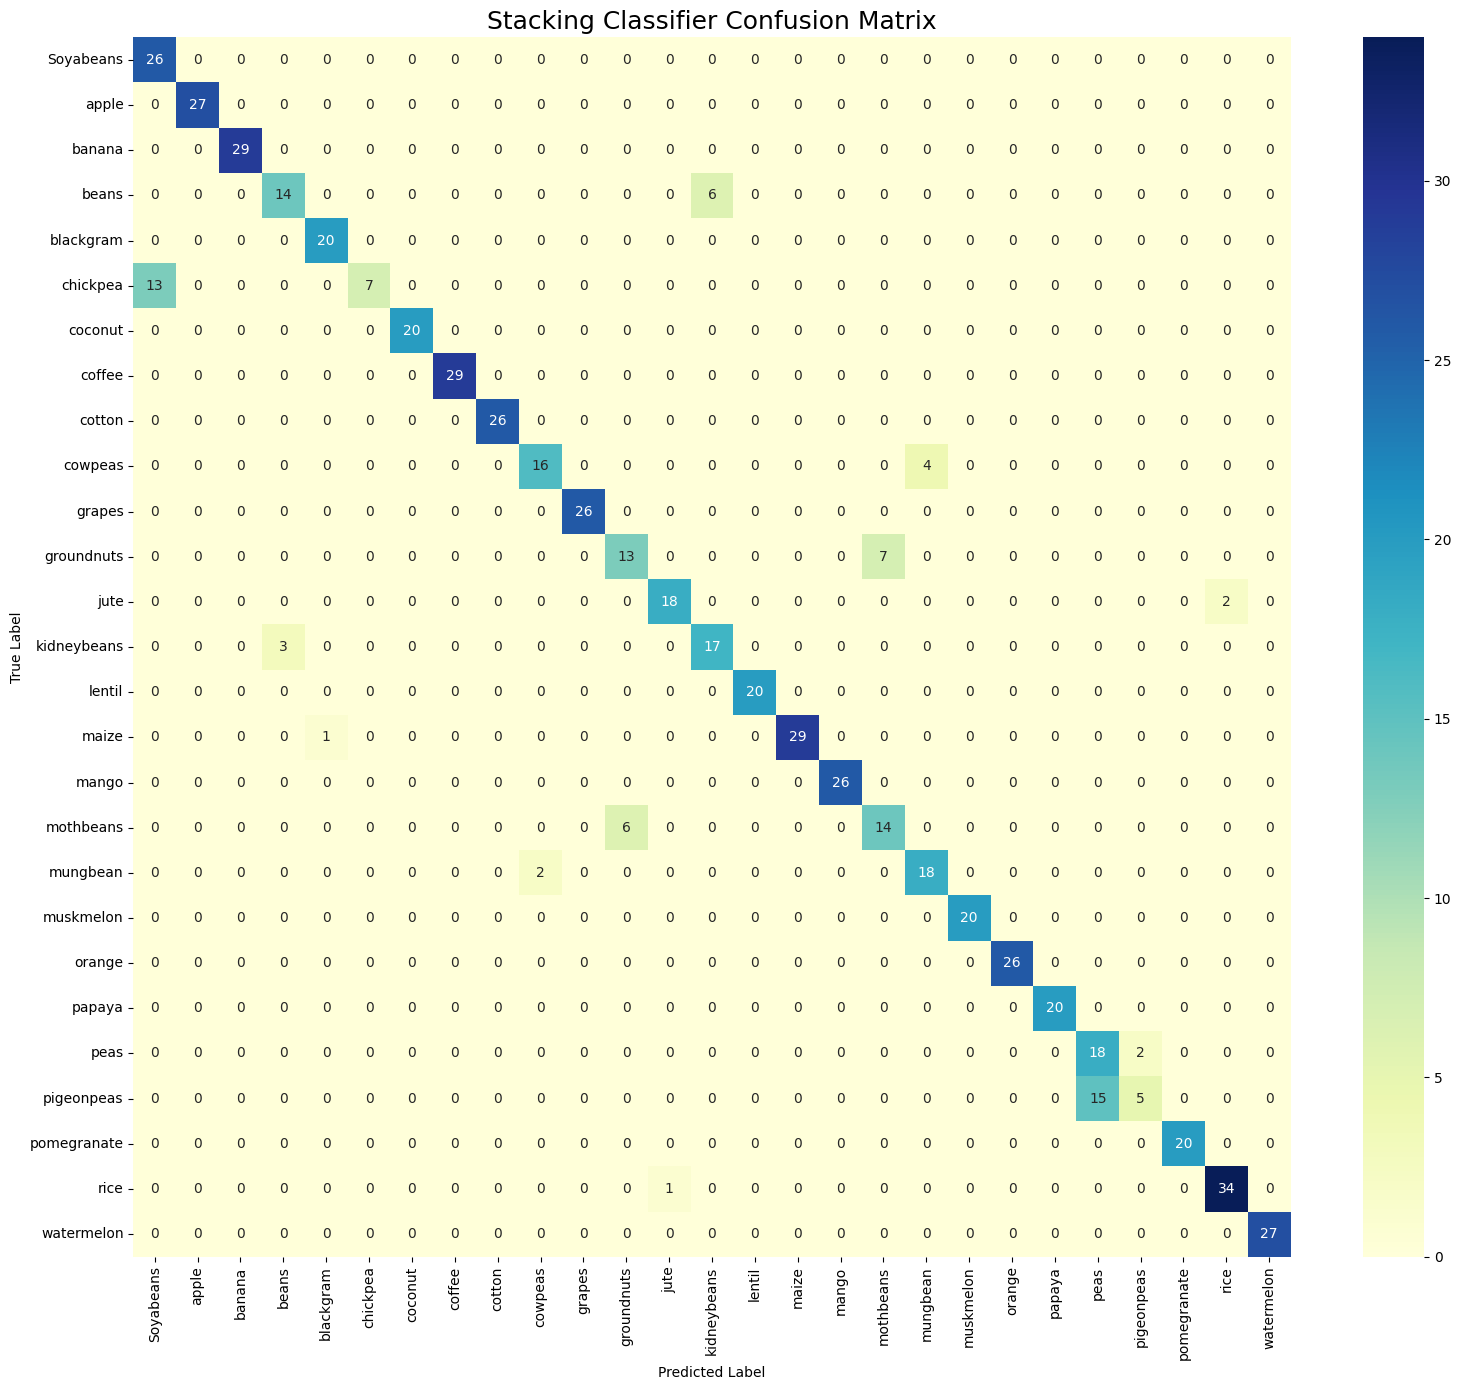

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
import pandas as pd

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(16, 14))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Stacking Classifier Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


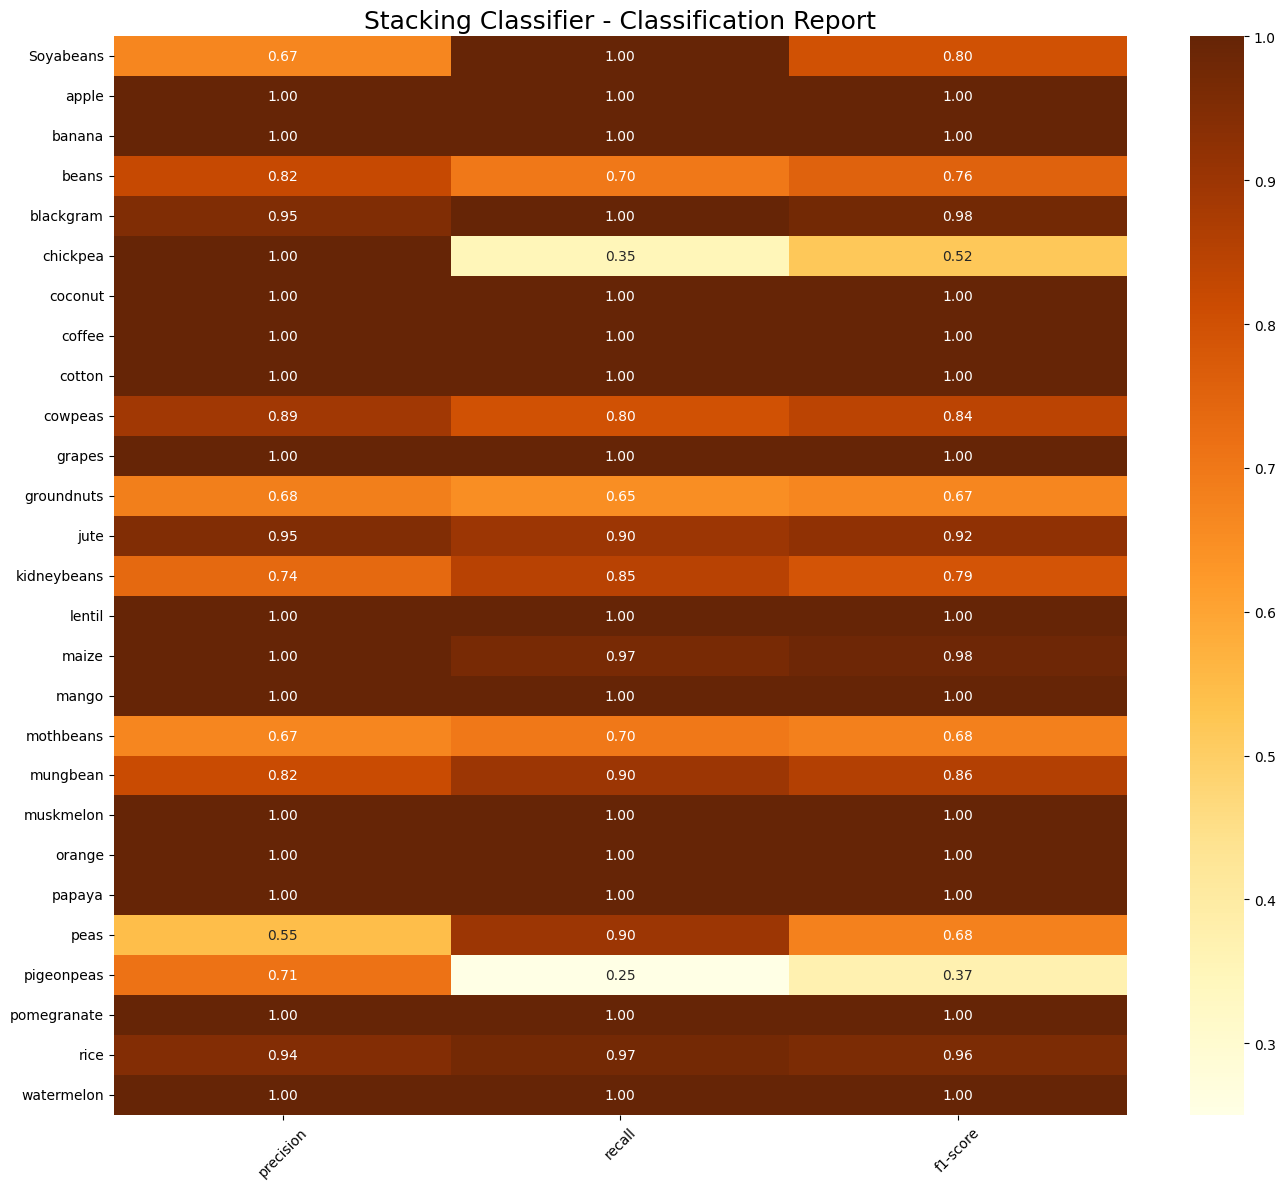

In [18]:
# Get classification report as dictionary
report = classification_report(y_test, y_pred_stack, target_names=label_encoder.classes_, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop support column to visualize better
report_df = report_df.drop(columns=['support'])

# Heatmap of precision, recall, f1-score
plt.figure(figsize=(14, 12))
sns.heatmap(report_df.iloc[:-3], annot=True, cmap='YlOrBr', fmt=".2f")  # Skip accuracy/avg rows
plt.title("Stacking Classifier - Classification Report", fontsize=18)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

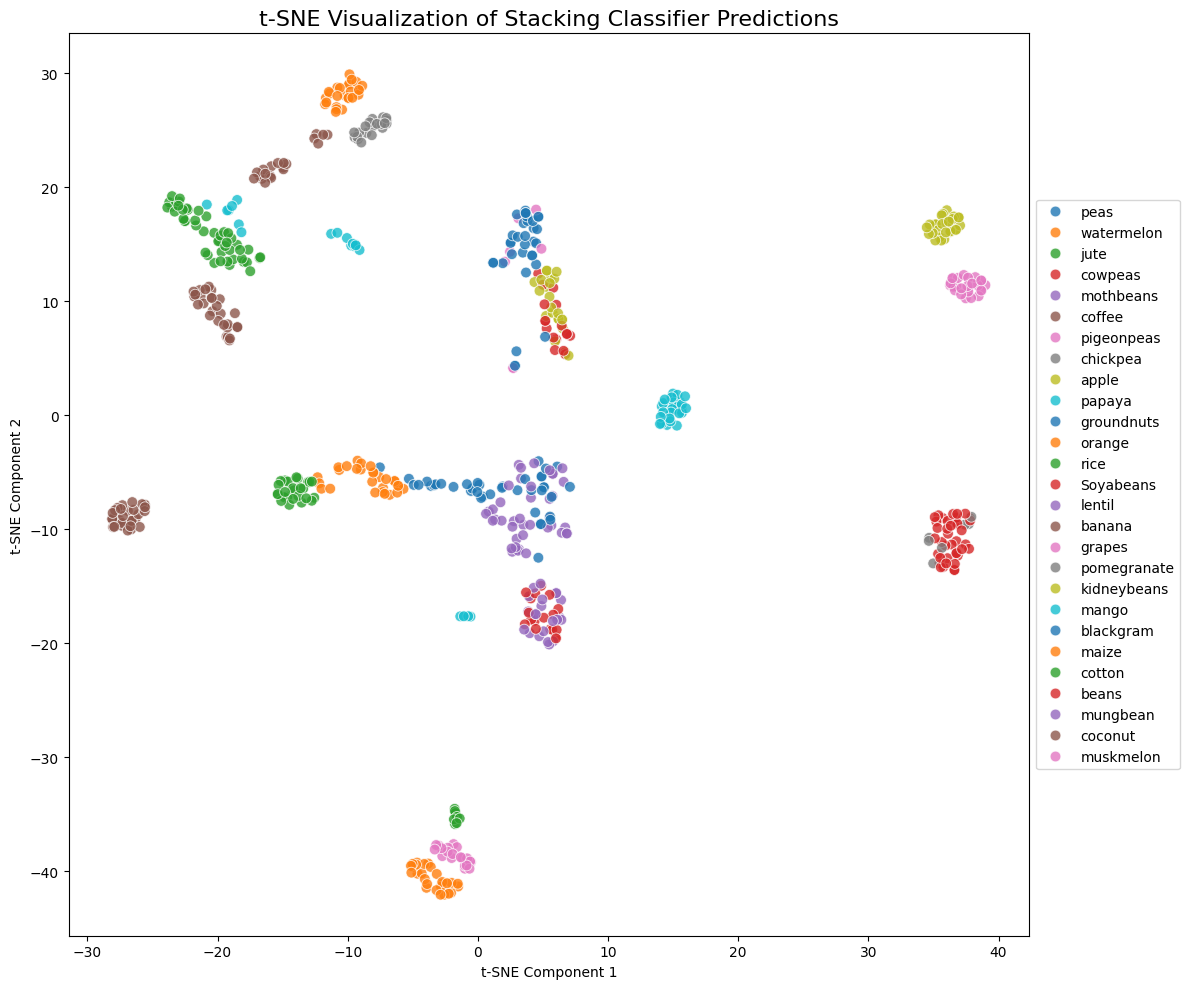

In [20]:
# Reduce features to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_test_2d_tsne = tsne.fit_transform(X_test)

# Plot t-SNE
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_test_2d_tsne[:, 0], y=X_test_2d_tsne[:, 1],
                hue=label_encoder.inverse_transform(y_pred_stack),
                palette='tab10', legend='full', s=60, alpha=0.8)
plt.title("t-SNE Visualization of Stacking Classifier Predictions", fontsize=16)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

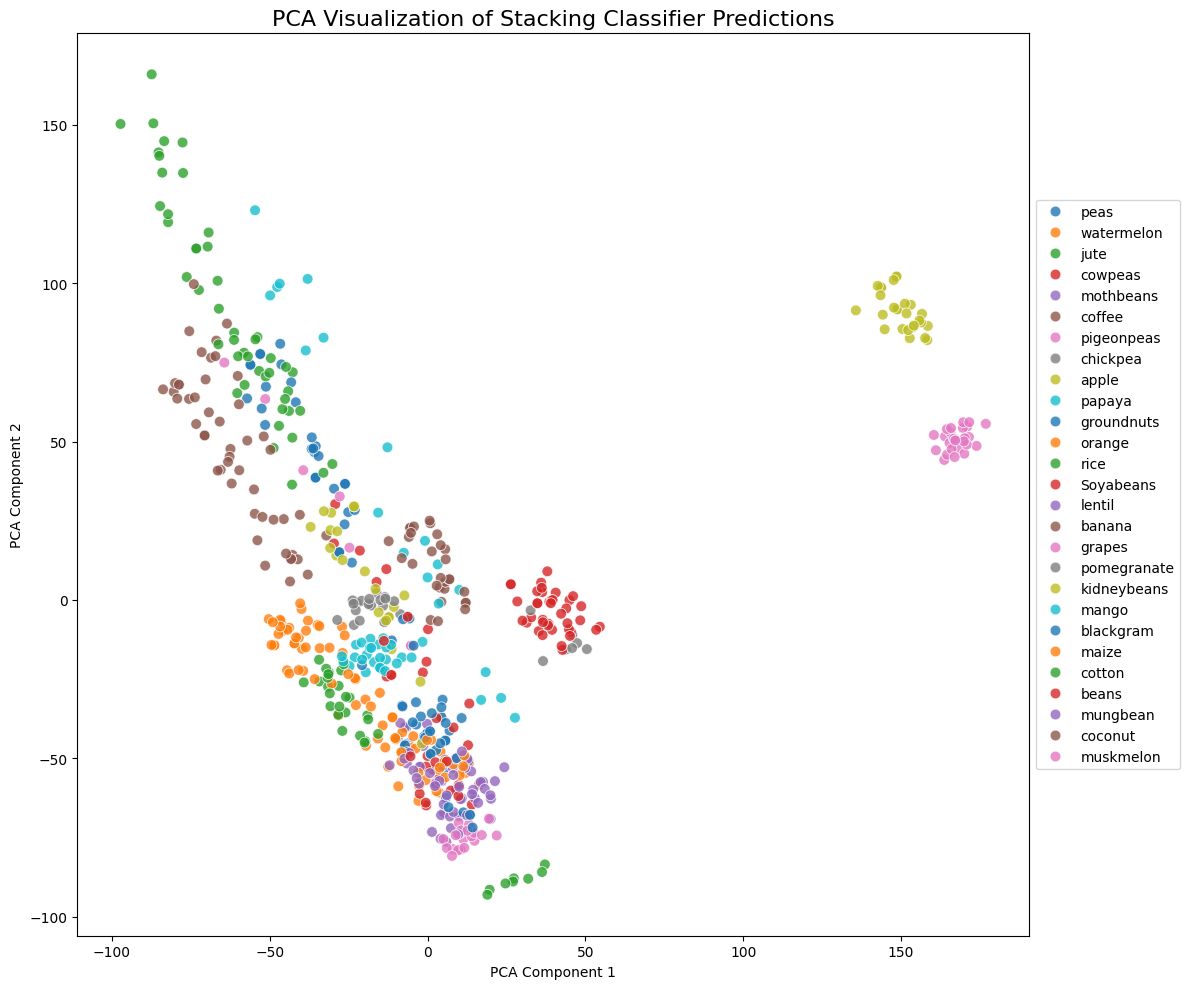

In [21]:
# Reduce features to 2D using PCA
pca = PCA(n_components=2)
X_test_2d_pca = pca.fit_transform(X_test)

# Plot PCA
plt.figure(figsize=(12, 10))
sns.scatterplot(x=X_test_2d_pca[:, 0], y=X_test_2d_pca[:, 1],
                hue=label_encoder.inverse_transform(y_pred_stack),
                palette='tab10', legend='full', s=60, alpha=0.8)
plt.title("PCA Visualization of Stacking Classifier Predictions", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()
